# Transfer learning


Reference:

Keras Documentation:  https://keras.io/applications/#usage-examples-for-image-classification-models

Transfer Learning Example : https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/



**Environment:**

- Keras-gpu 2.2.0
- matplotlib 2.2.2
- pillow 5.1.0


# Build a base model

In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
# from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image   # for load_image


# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Using TensorFlow backend.


# Create a new model

In [2]:
# from keras import models
# from keras import layers
# from keras import optimizers
 
targetClassNumber = 11   
    
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(base_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(targetClassNumber, activation='softmax'))

# Freeze layers from pretrained model

In [3]:
# Freeze the layers except the last 4 layers
for layer in model.layers[:-4]:
    layer.trainable = False
 
# # Check the trainable status of the individual layers
# for layer in vgg_conv.layers:
#     print(layer, layer.trainable)

# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                11275     
Total params: 74,243,883
Trainable params: 52,441,099
Non-trainable params: 21,802,784
_________________________________________________________________


# Setup the data generators

In [4]:
train_dir = './train'
validation_dir = './validation'
image_size = 224
 
# nTrain = 600
# nVal = 150

# from keras.preprocessing.image import ImageDataGenerator
# import numpy as np
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 33
val_batchsize = 22
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 33 images belonging to 11 classes.
Found 22 images belonging to 11 classes.


# Train the model


In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
# from keras.optimizers import SGD
# model.compile(loss='categorical_crossentropy',
#               optimizer=SGD(lr=0.0001, momentum=0.9),               
#               metrics=['acc'])


# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('faceID_InceptionV3_gpu.h5')

Epoch 1/40
1/1 [==============================] - 10s 10s/step - loss: 2.9864 - acc: 0.1515 - val_loss: 9.4325 - val_acc: 0.0909
Epoch 2/40
1/1 [==============================] - 1s 1s/step - loss: 7.5655 - acc: 0.1515 - val_loss: 8.7859 - val_acc: 0.1818
Epoch 3/40
1/1 [==============================] - 1s 1s/step - loss: 6.6334 - acc: 0.3333 - val_loss: 7.2885 - val_acc: 0.0909
Epoch 4/40
1/1 [==============================] - 1s 1s/step - loss: 5.6504 - acc: 0.3333 - val_loss: 7.9209 - val_acc: 0.3182
Epoch 5/40
1/1 [==============================] - 1s 1s/step - loss: 5.8875 - acc: 0.3030 - val_loss: 5.9943 - val_acc: 0.3182
Epoch 6/40
1/1 [==============================] - 1s 1s/step - loss: 4.3802 - acc: 0.4242 - val_loss: 6.3837 - val_acc: 0.3182
Epoch 7/40
1/1 [==============================] - 1s 994ms/step - loss: 3.9174 - acc: 0.5152 - val_loss: 7.8179 - val_acc: 0.2273
Epoch 8/40
1/1 [==============================] - 1s 1s/step - loss: 3.7902 - acc: 0.4848 - val_loss: 6.77

# Check Performance

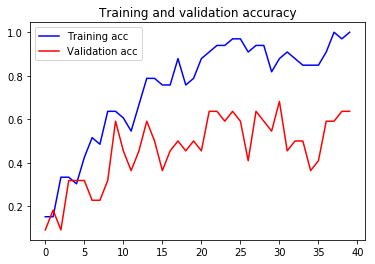

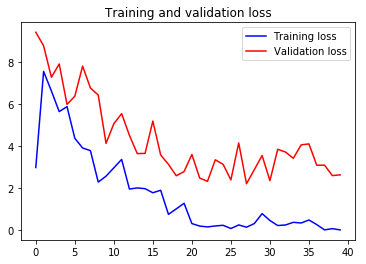

In [6]:
# %matplotlib inline
# import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Found 22 images belonging to 11 classes.
1/1 [==============================] - 2s 2s/step
No of errors = 8/22


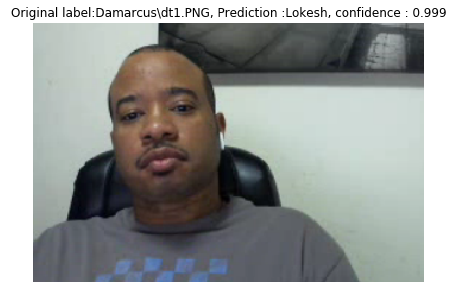

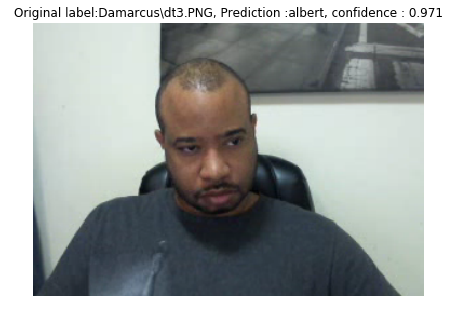

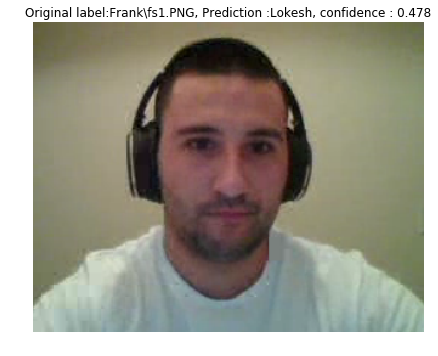

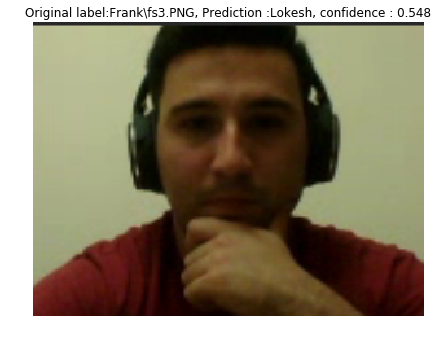

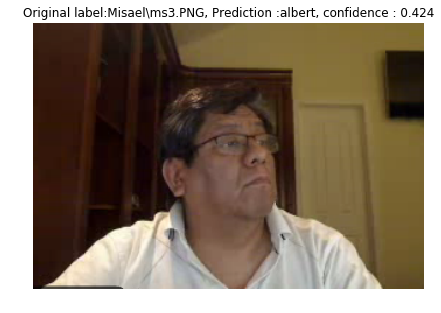

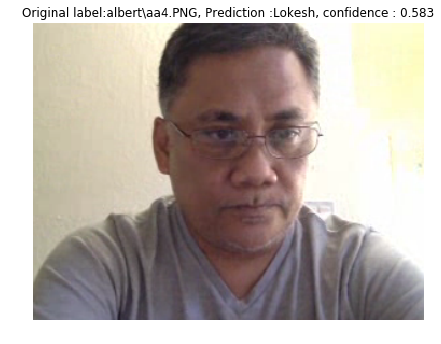

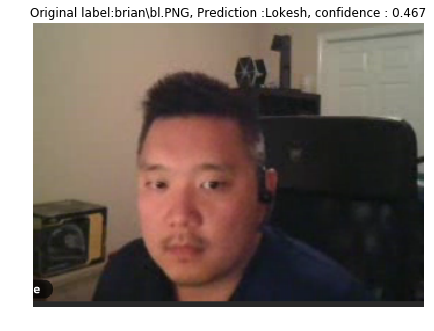

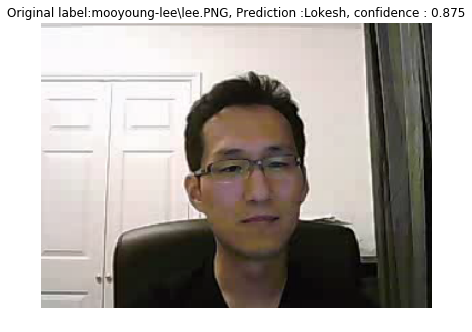

In [7]:
# from keras.preprocessing import image   # for load_image

# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = image.load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()